# SVM

$f(x)=sign(w^Tx+b)$

$sign(x)=\begin{cases}+1,&x>0\\0,&x=0\\ -1, &x<0\end{cases}$

硬间隔分类器  
软间隔分类器  
核方法  

感知机可能有着不同的解  
SVM是一种大间隔分类器，尽可能地将分类分的更明显


$$ 
\left\{
\begin{align}
& max margin(w, b) \\
& s.t. y_i(w^Tx_i+b)>0, i=1,2,..,N \tag{1}\\
& margin(w, b) = min distance(w, b, x_i)=min\frac{1}{\Arrowvert w \Arrowvert}|w^Tx+b| \tag{2}\\
\end{align}
\right.
$$
(1)正确分类  
(2)离超平面最近的点到平面的距离

$$\Rightarrow
\left\{ 
\begin{align}
& max min\underbrace{\frac{1}{\Arrowvert w \Arrowvert}}_{num}|w^Tx+b|= max \underbrace{\frac{1}{\Arrowvert w \Arrowvert}}_{num}min|w^Tx+b|=max  \underbrace{\frac{1}{\Arrowvert w \Arrowvert}}_{num}miny_i(w^Tx+b) \tag{1} \\
& s.t. y_i(w^Tx_i+b)>0 \Rightarrow \exists r>0 , min y_i(w^Tx_i+b)=r=1 \tag{2}\\
\end{align}
\right.
$$

式(1)使得离超平面最近的点离超平面的距离最大  
式(2)简化运算，w,b可以缩放，相当于给一个约束，使r=1

$$ \Rightarrow
\left\{
\begin{array}{l}
max \frac{1}{\Arrowvert w \Arrowvert}\Rightarrow min \Arrowvert w \Arrowvert \\
s.t. miny_i(w^Tx_i+b)=1 \Leftrightarrow y_i(w^Tx_i+b) \geqslant 1 \\
\end{array}
\right.
$$

转化为一个优化问题，凸优化问题，原问题，带约束

$$ \Rightarrow
\left\{
\begin{array}{l}
min \Arrowvert w \Arrowvert=min\frac{1}{2}w^Tw  \\
s.t. y_i(w^Tx_i+b) \geqslant 1,  \forall i=1,2,\dots ,N\Leftarrow N constraints \\
\end{array}
\right.
$$


$$ \Rightarrow
\left\{
\begin{array}{l}
 min\frac{1}{2}w^Tw \\
 s.t. 1-y_i(w^Tx_i+b) \leqslant 0\\
\end{array}
\right.
$$

拉格朗日函数  
$L(w,b,\lambda)=\frac{1}{2}w^Tw+\sum_{i=1}^N\lambda_i(1-y_i(w^Tx_i+b))$

无约束 
$$ \Rightarrow
\left\{
\begin{array}{l}
\underbrace{min}_{w,b}\underbrace{max}_{\lambda} L(w,b,\lambda)\\
s.t.\lambda_i\geqslant 0\\
\end{array}
\right.
$$

**为什么带约束与无约束等价？**  
设$\Delta = 1-y_i(w^Tx_i+b),\lambda_i\geqslant 0$

无约束时  
如果$\Delta > 0$  
$maxL(w,b,\lambda)=\frac{1}{2}w^Tw+\infty=\infty$
如果$\Delta \leqslant 0$  
$maxL(w,b,\lambda)=\frac{1}{2}w^Tw+0=\frac{1}{2}w^Tw$

$min maxL(w,b,\lambda)=min(\infty, \frac{1}{2}w^Tw)=min \frac{1}{2}w^Tw$ $\Rightarrow$相当于自动丢弃$\Delta >0$的部分，所以二者等价

一般情况下，$minmaxL\geqslant maxminL$  
由于是凸优化，为强对偶关系，所以$minmaxL= maxminL$   
转化为强对偶问题

$$ \Rightarrow
\left\{
\begin{array}{l}
\underbrace{max}_{\lambda}\underbrace{min}_{w,b} L(w,b,\lambda)\\
s.t.\lambda_i\geqslant 0\\
\end{array}
\right.
$$

先求$minL(w,b,\lambda))$

$$L(w,b,\lambda)=\frac{1}{2}w^Tw+\sum_{i=1}^N\lambda_i(1-y_i(w^Tx_i+b))$$

令
$\frac{\partial L}{\partial b} = -\sum_{i=1}^N \lambda_iy_i =0 \Rightarrow \sum_{i=1}^N \lambda_iy_i =0$

$$L(w,b,\lambda) = \frac{1}{2}w^Tw+\sum_{i=1}^N\lambda_i-\sum_{i=1}^N\lambda_iy_iw^Tx_i-\underbrace{\sum_{i=1}^N\lambda_iy_i}_{0}b =\frac{1}{2}w^Tw+\sum_{i=1}^N\lambda_i-\sum_{i=1}^N\lambda_iy_iw^Tx_i$$

令
$\frac{\partial L}{\partial w} = \frac{1}{2}2w-\sum_{i=1}^N\lambda_iy_ix_i=0 \Rightarrow w^* = \sum_{i=1}^N\lambda_iy_ix_i$ 

此时，$L$已为$minL$

$$
\begin{align}
minL(w,b,\lambda)&=\frac{1}{2}(\sum_{i=1}^N\lambda_iy_ix_i)^T(\sum_{j=1}^N\lambda_jy_jx_j)-\sum_{i=1}^N\lambda_i-\sum_{i=1}^N\lambda_iy_i(\sum_{j=1}^N\lambda_jy_jx_j)^Tx_i+\sum_{i=1}^N\lambda_i \\
&=-\frac{1}{2}\sum_{i=1}^N\sum_{j=1}^N\lambda_i\lambda_jy_iy_jx_i^Tx_j+\sum_{i=1}^N\lambda_i
\end{align}
$$

其中$\lambda_i,y_i$是数

简化对偶问题
$$ \Rightarrow
\left\{
\begin{array}{l}
\underbrace{max}_\lambda -\frac{1}{2}\sum_{i=1}^N\sum_{j=1}^N\lambda_i\lambda_jy_iy_jx_i^Tx_j+\sum_{i=1}^N\lambda_i\\
s.t.\lambda_i \geqslant 0
\end{array}
\right.
$$


$$ \Rightarrow
\left\{
\begin{array}{l}
\underbrace{min}_\lambda \frac{1}{2}\sum_{i=1}^N\sum_{j=1}^N\lambda_i\lambda_jy_iy_jx_i^Tx_j-\sum_{i=1}^N\lambda_i\\
s.t.\lambda_i \geqslant 0\\
\sum_{i=1}^N\lambda_iy_i=0 \Leftarrow \frac{\partial L}{\partial b}=0\\
\end{array}
\right.
$$

KKT条件 $\Leftrightarrow$ 原问题对偶问题具有强对偶关系

$$ \Rightarrow
\left\{
\begin{array}{l}
\frac{\partial L}{\partial w}=0 \\
\frac{\partial L}{\partial b}=0 \\
\lambda_i(1-y_i(w^Tx+b))=0 \\
\lambda_i \geqslant 0\\
1-y_i(w^Tx+b) \leqslant 0
\end{array}
\right.
$$

$\exists(x_i, y_i), \Delta=1-y_i(w^Tx+b)=0\Rightarrow w^Tx+b=\pm1\Rightarrow (x_i,y_i)$为支持向量，$r=\pm1$  
当$\Delta < 0$时， $(x_i,y_i)$为非支持向量  
根据KKT条件  
$\Delta < 0,\lambda_i=0$  
$\Delta = 0,\lambda_i$无限制  
即只有支持向量的$\lambda_i$有值，其余为零，所以只有支持向量起作用

根据求导  
$w^*=\sum_{i=1}^N\lambda_iy_ix_i$

$\exists(x_k,y_k),s.t.1-y_k(w^Tx_k+b)=0$

$\Rightarrow y_k(w^Tx_k+b)=1$

$\Rightarrow y_k^2(w^Tx_k+b)=(w^Tx_k+b)=y_k$

$\Rightarrow b^* = y_k-w^Tx_k=y_k-\sum_{i=1}^N\lambda_iy_ix_i^Tx_k$

$$ \Rightarrow
\left\{
\begin{array}{l}
w^*=\sum_{i=1}^N\lambda_iy_ix_i\\
b^* =y_k-\sum_{i=1}^N\lambda_iy_ix_i^Tx_k\\
\end{array}
\right.
$$

$\Rightarrow f(x)=sign({w^*}^T+b^*)$

**软间隔**允许有分类错误的点，求解和硬间隔类似  

$$ loss=
\begin{cases}
0, & y_i(w^Tx_i+b)\geqslant 1, correct points\\
1-y_i(w^Tx_i+b),&y_i(w^Tx_i+b)<1,between 1 and S\\
\end{cases}
$$

$\Rightarrow loss=max\{0, 1-y_i(w^Tx_i+b)\}$   
C为松弛变量，用来控制loss  
$C\geqslant \lambda_i\geqslant 0$

$$ \Rightarrow
\left\{
\begin{array}{l}
min\frac{1}{2}w^Tw+loss=min\frac{1}{2}w^Tw+C\sum_{i=1}^Nmax\{0, 1-y_i(w^Tx_i+b)\}\\
s.t. y_i(w^Tx_i+b) \geqslant 1\\
\end{array}
\right.
$$

设 $\zeta_i=1-y_i(w^Tx_i+b)，\zeta_i\geqslant 0$

$$ \Rightarrow
\left\{
\begin{array}{l}
min\frac{1}{2}w^Tw+C\sum_{i=1}^N\zeta_i\\
s.t. y_i(w^Tx_i+b) \geqslant {1-\zeta_i}\\
\zeta_i\geqslant 0\\
\end{array}
\right.
$$

啊啊啊，SVM。

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import  train_test_split
import matplotlib.pyplot as plt
%matplotlib inline


iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
df.head()

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


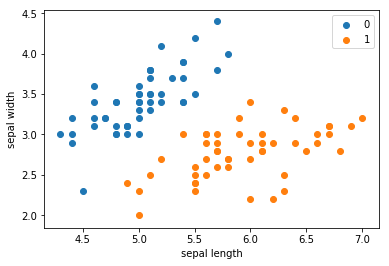

In [2]:
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [3]:
data = np.array(df.iloc[:100, [0, 1, -1]])
X, y = data[:,[0,1]], data[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [4]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [5]:

clf.score(X_test, y_test)

1.0